In [24]:
import pandas as pd
import numpy as np
import random

Generujemy zbiór danych:

In [25]:
X_A,X_B,Y_A,Y_B = [],[],[],[] 
for j in range(30): 
  X_A.append(random.random()*4.9) 
  X_B.append(random.random()*5.1+5)
  Y_A.append(random.random()*5.1) 
  Y_B.append(random.random()*4.9+5)  

Punkty podzielone są na dwie klasy. Interesuje nas przynależność punktu (5,5) - punkt zielony.

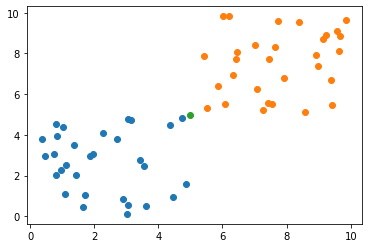

In [26]:
import matplotlib.pyplot as plt
plt.scatter(X_A,Y_A)
plt.scatter(X_B,Y_B)
plt.scatter(5,5)
plt.show()

Łączymy współrzędne w krotki i zapisujemy je w tablicy. Etykiety umieszczamy w tablicy.

In [27]:
X_A = np.array(X_A)
X_B = np.array(X_B)
Y_A = np.array(Y_A)
Y_B = np.array(Y_B)
X = np.concatenate([X_A,X_B])
Y = np.concatenate([Y_A,Y_B])

data = list(zip(X,Y))
L_0 = np.full((30,),0)
L_1 = np.full((30,),1)
L = np.concatenate([L_0,L_1])
data,L

([(3.617171019754042, 0.5019193891470678),
  (0.46596490605975865, 2.964428140355346),
  (0.3751395873591096, 3.7729755467636643),
  (1.6629785503512464, 0.46225797494355386),
  (4.459233919235428, 0.9629914464592356),
  (3.041118979100316, 0.5441236766451497),
  (1.9703797677356307, 3.0561516823583066),
  (4.864913982433372, 1.5793828842514333),
  (4.733835918593861, 4.8262896266309685),
  (1.1109784794943462, 2.511524337525316),
  (1.4481497250663267, 2.042563664110412),
  (2.2784001029825465, 4.082563287603871),
  (3.5677644856977144, 2.483048323247082),
  (4.362948109841908, 4.466492921227131),
  (3.0330459955090734, 0.11597616626244223),
  (0.8543233386074509, 3.960220640666344),
  (1.8555545813876895, 2.9458846747718215),
  (1.3641319988938372, 3.4931405646913323),
  (0.8130990796821035, 4.532618376359794),
  (3.063254643519773, 4.783749102756461),
  (1.6992989920019572, 1.0310619532487744),
  (2.718775797549668, 3.8145562742992123),
  (0.9599115050325665, 2.2702690187042047),
  

Klasyfikacja dla k=3:

In [134]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(data, L)

point = np.array([[5,5]])

print(neigh.predict(point))

[0]


**mój kNN:**

In [159]:
import math

k = 5;
data_point = np.array([[5, 5]])
new_arr = np.array([[0, 0, 0, 0]])

for i in range(len(data)):
    d = math.sqrt( ((float(data[i][0]) - data_point[0][0]) **2) + (float(data[i][1]) - data_point[0][1]) **2 )
    new_arr = np.append(new_arr, [[d, L[i], data[i][0], data[i][1]]], axis = 0)

new_arr = np.delete(new_arr, 0, axis = 0)
sorted_arr = new_arr[np.argsort(new_arr[:,0])]
nearest_tab = []

for i in range(k):
  nearest_tab.append([NewData[i, 0], NewData[i, 1], NewData[i, 2], NewData[i, 3]])

#print(np.sum(nearest_tab[:,1] == 1.0))
#print(np.sum(nearest_tab[:,1] == 0.0))

if (sum(row.count(1.0) for row in nearest_tab) > sum(row.count(0.0) for row in nearest_tab)):
  print("Wynik: ", 1);
else:
  print("Wynik: ", 0);

Wynik:  1


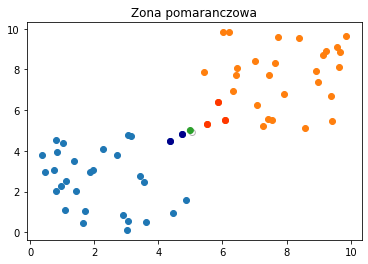

In [164]:
import matplotlib.patheffects as path_effects

plt.scatter(X_A,Y_A)
plt.scatter(X_B,Y_B)

for i in range(k):
  if (sorted_arr[i][1] == 0.0):
    plt.scatter(sorted_arr[i][2], sorted_arr[i][3], c = "#00008B");
  else:
    plt.scatter(sorted_arr[i][2], sorted_arr[i][3], c = "#ff3700");

plt.scatter(data_point[0][0], data_point[0][1], path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])

plt.title("Zona pomaranczowa") if sum(row.count(1.0) for row in nearest_tab) > sum(row.count(0.0) for row in nearest_tab) else plt.title("Zona granatowa")
  
plt.show()